In [ ]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()

import feature_extractor

from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import pickle


In [47]:

tau=2.2
alpha=1.3
desiredAvgDegree= 60.0
df = pd.DataFrame(columns=['n', 'pec', 'd'])

ns = [1000, 2000, 3000] #, 4000, 6000, 8000, 10000]


for d in [1,2,3]:
        print(f'd: {d}')
        ns = [800, 1600, 2500, 4000, 8000, 15000]
        pecs = []
        for n in ns:
                g, edges, weights, pts, const = generation.generate_GIRG_nk(
                        n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsCube)

                g2, _, weights2, pts2, const2 = generation.generate_GIRG_nk(
                        n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, pts=pts, points_type=points.PointsCube, weights=weights)

                A, A2 = utils.adj_mat(g), utils.adj_mat(g2)

                out, pec, pnec = mcmc.CM(A, A2)
                print(f'n: {n} pec: {pec}')
                pecs.append(pec)
                df = df.append({'n': n, 'pec': pec, 'd': d}, ignore_index=True)

d: 1


../benji_girgs/generation.py:161: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:738: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:739: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


n: 800 pec: 0.633458902555258
n: 1600 pec: 0.5822011468901632
n: 2500 pec: 0.5762220847162063
n: 4000 pec: 0.5452200250048425
n: 8000 pec: 0.507212556503401
n: 15000 pec: 0.5161141646430807
d: 2
n: 800 pec: 0.6340255591054313
n: 1600 pec: 0.6132479180012812
n: 2500 pec: 0.594557018665303
n: 4000 pec: 0.6113054941569448
n: 8000 pec: 0.5429174495618253
n: 15000 pec: 0.5258546421042984
d: 3
n: 800 pec: 0.6523897409788073
n: 1600 pec: 0.5806894747170799
n: 2500 pec: 0.6101857170208692
n: 4000 pec: 0.58938628507892
n: 8000 pec: 0.5444121824747149
n: 15000 pec: 0.5291706467721848


In [50]:
df_copy = df.copy()
df.d = df.d.astype('category')

<AxesSubplot: xlabel='n', ylabel='pec'>

Text(0.5, 1.0, 'alpha=1.3, tau=2.2, deg_bar=60 PEC for identical p_uv ')

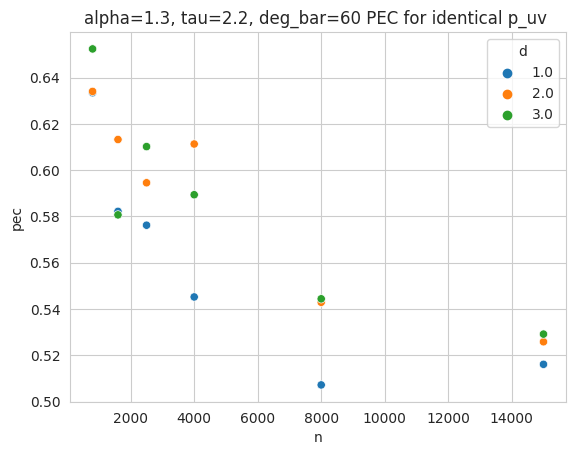

In [54]:
import seaborn as sns
# df.plot(x='n', y='pec', kind='scatter', logx=True, logy=True)
sns.scatterplot(data=df, x='n', y='pec', hue='d')
plt.title('alpha=1.3, tau=2.2, deg_bar=60 PEC for identical p_uv ')
plt.savefig('/cluster/home/bdayan/girgs/pec_girg_identical_puv.png')

In [55]:
df.to_csv('/cluster/home/bdayan/girgs/pec_girg_identical_puv.csv')

In [56]:

tau=2.2
alpha=1.3
desiredAvgDegree= 60.0
df2 = pd.DataFrame(columns=['n', 'pec', 'd'])

d = 1
print(f'd: {d}')
ns = [800, 1600, 2500, 4000, 8000, 15000]
pecs = []
for n in ns:
        desiredAvgDegree = 60.0 * n/800
        g, edges, weights, pts, const = generation.generate_GIRG_nk(
                n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsCube)

        g2, _, weights2, pts2, const2 = generation.generate_GIRG_nk(
                n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, pts=pts, points_type=points.PointsCube, weights=weights)

        A, A2 = utils.adj_mat(g), utils.adj_mat(g2)

        out, pec, pnec = mcmc.CM(A, A2)
        print(f'n: {n} pec: {pec}')
        pecs.append(pec)
        df2 = df2.append({'n': n, 'pec': pec, 'd': d}, ignore_index=True)

d: 1


../benji_girgs/generation.py:161: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:738: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:739: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


n: 800 pec: 0.6386766160208577
n: 1600 pec: 0.6415643035188969
n: 2500 pec: 0.625817486668679
n: 4000 pec: 0.626255486272148
n: 8000 pec: 0.6241642592749695
n: 15000 pec: 0.6324530027043747


In [57]:
ns = [800, 1600, 2500, 4000, 8000, 15000]
for n in ns:
        weights = generateWeights(n, tau)
        c = const_conversion(const, alpha, d=d, true_volume=true_volume)

3

In [42]:
n = 2000
d=3
tau=2.2
alpha=1.3
desiredAvgDegree= 60.0

ns = [1000, 2000, 3000] #, 4000, 6000, 8000, 10000]
ns = [800, 1600, 2500, 4000, 8000, 15000]
pecs = []
for n in ns:
        g, edges, weights, pts, const = generation.generate_GIRG_nk(
                n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsCube)

        g2, _, weights2, pts2, const2 = generation.generate_GIRG_nk(
                n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, pts=pts, points_type=points.PointsCube, weights=weights)

        A, A2 = utils.adj_mat(g), utils.adj_mat(g2)

        out, pec, pnec = mcmc.CM(A, A2)
        print(f'n: {n} pec: {pec}')
        pecs.append(pec)

n: 800 pec: 0.6735016732582902
n: 1600 pec: 0.6119304007326238
n: 2500 pec: 0.577290971903269
n: 4000 pec: 0.5800332453309867
n: 8000 pec: 0.5641061428147734


In [32]:
g2, _, weights2, pts2, const2 = generation.generate_GIRG_nk(
        n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, pts=pts, points_type=points.PointsTorus2, weights=weights)

In [33]:
nk.overview(g)
nk.overview(g2)

Network Properties:
nodes, edges			2000, 59818
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.029924
clustering coefficient		0.477226
min/max/avg degree		14, 1651, 59.818000
degree assortativity		-0.121172
number of connected components	1
size of largest component	2000 (100.00 %)
Network Properties:
nodes, edges			2000, 59835
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.029932
clustering coefficient		0.479722
min/max/avg degree		13, 1657, 59.835000
degree assortativity		-0.122199
number of connected components	1
size of largest component	2000 (100.00 %)


In [34]:
A, A2 = utils.adj_mat(g), utils.adj_mat(g2)

In [35]:
out, pec, pnec = mcmc.CM(A, A2)

In [36]:
pec
out

0.5954896519442309

array([[  71242,   48394],
       [  48428, 3831936]])

/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Bowdoin47-1d_nodes_2250.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Brandeis99-1d_nodes_3887.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Brandeis99-2d_nodes_3887.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Bowdoin47-3d_nodes_2250.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Bowdoin47-2d_nodes_2250.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Brandeis99-3d_nodes_3887.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Caltech36-1d_nodes_762.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Caltech36-2d_nodes_762.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Caltech36-3d_nodes_762.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-CMU-1d_nodes_6621.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Emory27-1d_nodes_7449.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Haverford76-1d_nodes_1446.csv
/cluster/home/bdayan/girgs/MCMC_ordered6/dfs/socfb-Haverfo

<Figure size 800x600 with 0 Axes>

TypeError: unhashable type: 'Series'

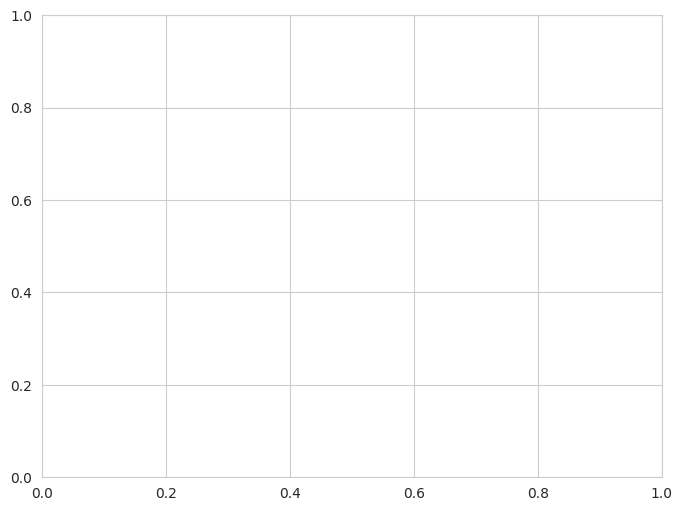

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import glob
folder = '/cluster/home/bdayan/girgs/MCMC_ordered6/'
fn_pickles = glob.glob(folder + 'pickles/*')
fn_dfs = glob.glob(folder + 'dfs/*')

# i = 1
# fn = fn_pickles[i]
# print(fn)
# with open(fn, 'rb') as f:
#     MC = pickle.load(f)
# fn = fn_dfs[i]
# print(fn)
# df = pd.read_csv(fn)

import re
df_out = pd.DataFrame(columns=['graph', 'd', 'nodes', 'll', 'CM', 'pec', 'alpha'])

for fn_df in fn_dfs:
    print(fn_df)
    name, d, nodes = re.match(f'.*(socfb-.*)-(\d)d_nodes_(\d*).csv', fn_df).groups()
    d, nodes = int(d), int(nodes)
    df = pd.read_csv(fn_df)
    ll, CM, pec, alpha = df.ll, df.out, df.pec, df.alpha
    df_out = df_out.append({'graph': name, 'd': d, 'nodes': nodes, 'll': ll, 'CM': CM, 'pec': pec, 'alpha': alpha}, ignore_index=True)

df_out['final_pec'] = df_out.pec.apply(lambda x: x.iloc[-1])
df_out['final_ll'] = df_out.ll.apply(lambda x: x.iloc[-1])
df_out['final_alpha'] = df_out.alpha.apply(lambda x: x.iloc[-1])




plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_out.loc[df_out.d == 1, ['nodes', 'pec']], x='nodes', y='pec', label='d=1')
sns.scatterplot(data=df_out.loc[df_out.d == 2, ['nodes', 'pec']], x='nodes', y='pec', label='d=2', color='r')
sns.scatterplot(data=df_out.loc[df_out.d == 3, ['nodes', 'pec']], x='nodes', y='pec', label='d=3', color='g')
plt.legend()
plt.title('Final PEC vs. Nodes')
# plt.savefig('/cluster/home/bdayan/mcmc_ordered_final_pec2.png')


In [8]:
df_out

,graph,d,nodes,ll,CM,pec,alpha,final_pec,final_ll,final_alpha
0,socfb-Bowdoin47,1,2250,0 -560396.175707 1 -530639.545912 2 -525...,0 [[ 38104 130668]\n [ 131094 4762634]] 1...,0 0.225772 1 0.275508 2 0.284087 3 ...,0 1.094766 1 1.092660 2 1.130548 3 ...,0.294622,-5.187688e+05,1.143041
1,socfb-Brandeis99,1,3887,0 -1.032980e+06 1 -9.791972e+05 2 -9.685...,0 [[ 49040 226082]\n [ 226302 14607345...,0 0.178248 1 0.228902 2 0.238934 3 ...,0 1.041088 1 1.089323 2 1.102333 3 ...,0.247941,-9.588554e+05,1.102333
2,socfb-Brandeis99,2,3887,0 -980831.349843 1 -946465.407251 2 -938...,0 [[ 60322 214800]\n [ 214526 14619121...,0 0.219255 1 0.254462 2 0.264508 3 ...,0 1.059252 1 1.070667 2 1.094284 3 ...,0.272483,-9.309201e+05,1.121152
3,socfb-Bowdoin47,3,2250,0 -513897.003275 1 -495018.959713 2 -489...,0 [[ 49490 119282]\n [ 120428 4773300]] 1...,0 0.293236 1 0.326808 2 0.336561 3 ...,0 1.054974 1 1.074022 2 1.106981 3 ...,0.346550,-4.844861e+05,1.139890
4,socfb-Bowdoin47,2,2250,0 -531453.521012 1 -512210.949929 2 -507...,0 [[ 44868 123904]\n [ 124938 4768790]] 1...,0 0.265850 1 0.299457 2 0.308961 3 ...,0 1.043887 1 1.056147 2 1.077409 3 ...,0.317173,-5.040407e+05,1.109894
...,...,...,...,...,...,...,...,...,...,...
84,socfb-Georgetown15,3,9388,0 -3.436326e+06 1 -3.304147e+06 2 -3.264...,0 [[ 176408 674830]\n [ 675240 86608066...,0 0.207237 1 0.238331 2 0.248760 3 ...,0 1.061808 1 1.056880 2 1.056880 3 ...,0.259500,-3.215879e+06,1.059105
85,socfb-Northeastern19,1,13868,0 -3.904803e+06 1 -3.679381e+06 2 -3.618...,0 [[ 78004 685834]\n [ 684370 19087...,0 0.102121 1 0.156109 2 0.174312 3 ...,0 1.001537 1 1.003928 2 1.010291 3 ...,0.190622,-3.564846e+06,1.019116
86,socfb-Bingham82,3,10001,0 -3.116133e+06 1 -2.979198e+06 2 -2.947...,0 [[ 148226 577558]\n [ 581048 98713169...,0 0.204229 1 0.240928 2 0.249110 3 ...,0 1.031042 1 1.008952 2 1.002517 3 ...,0.256936,-2.916372e+06,1.000000
87,socfb-UPenn7,1,14888,0 -6.454171e+06 1 -6.147135e+06 2 -6.064...,0 [[ 157028 1215942]\n [ 1218184 21906...,0 0.114371 1 0.163130 2 0.176840 3 ...,0 1.000554 1 1.000037 2 1.000003 3 ...,0.189318,-5.992433e+06,1.000000


In [61]:
list(df.final_pec.values)

[0.5522048951771146,
 0.5045883655925321,
 0.4565134889860572,
 0.4571968402645173,
 0.418983585921656,
 0.4002299458173649]

<Figure size 800x600 with 0 Axes>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

Text(0.5, 1.0, 'Final PEC vs. Nodes')

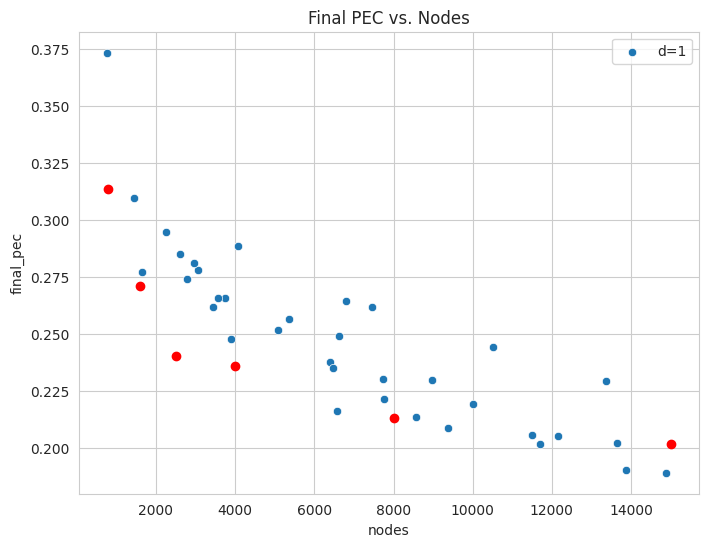

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_out.loc[df_out.d == 1], x='nodes', y='final_pec', label='d=1')
# sns.scatterplot(data=df_out.loc[df_out.d == 2, ['nodes', 'pec']], x='nodes', y='pec', label='d=2', color='r')
# sns.scatterplot(data=df_out.loc[df_out.d == 3, ['nodes', 'pec']], x='nodes', y='pec', label='d=3', color='g')
# plt.legend()
ns = np.array([800, 1600, 2500, 4000, 8000, 15000])
# ys = np.array([0.62, 0.60, 0.59, 0.57, 0.535, 0.52])
ys = df.final_pec.values
# [0.5522048951771146,
#  0.5045883655925321,
#  0.4565134889860572,
#  0.4571968402645173,
#  0.418983585921656,
#  0.4002299458173649]

plt.scatter(ns, 0.5*ys + 0.5*60/ns, color='r')
plt.title('Final PEC vs. Nodes')

In [50]:
import glob
glob.glob( '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/.*node 2d cube GIRG gen; 1d fit cube GIRG.csv')

[]

In [54]:
fns = glob.glob('/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/*')
fns = list(filter( lambda x: '2d cube GIRG gen' in x and '1d fit cube GIRG' in x, fns))
# fns = list(filter(fns, lambda x: '2d cube GIRG gen' in x))
fns

['/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/800 node 2d cube GIRG gen; 1d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/1600 node 2d cube GIRG gen; 1d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/2500 node 2d cube GIRG gen; 1d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/4000 node 2d cube GIRG gen; 1d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/8000 node 2d cube GIRG gen; 1d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/15000 node 2d cube GIRG gen; 1d fit cube GIRG.csv']

In [55]:
pd.read_csv(fns[0])

df = pd.DataFrame(columns=['nodes', 'final_pec'])
for fn in fns:
    pec = pd.read_csv(fn).pec.iloc[-1]
    nodes = int(re.search('(\d*00)', fn).group(0))
    df = df.append({'nodes': nodes, 'final_pec': pec}, ignore_index=True)

,Unnamed: 0,loop,ll,out,pec,alpha
0,0,0,-93025.260098,[[ 20140 18592]\n [ 54288 546980]],0.519983,1.300000
1,1,1,-91330.921447,[[ 20874 17858]\n [ 53518 547750]],0.538934,1.345233
2,2,2,-90907.597448,[[ 20832 17900]\n [ 53718 547550]],0.537850,1.345233
3,3,3,-90742.847809,[[ 21182 17550]\n [ 53420 547848]],0.546886,1.428093
4,4,4,-90549.411754,[[ 21206 17526]\n [ 52954 548314]],0.547506,1.428093
5,5,5,-90477.279598,[[ 21322 17410]\n [ 52862 548406]],0.550501,1.428093
6,6,6,-90447.197528,[[ 21088 17644]\n [ 52618 548650]],0.544459,1.428093
7,7,7,-90419.028163,[[ 21388 17344]\n [ 53316 547952]],0.552205,1.428093


In [56]:
df

,nodes,final_pec
0,800.0,0.552205
1,1600.0,0.504588
2,2500.0,0.456513
3,4000.0,0.457197
4,8000.0,0.418984
5,15000.0,0.400230


In [ ]:
ns=df.ns
